In [1]:
import pandas as pd
import numpy as np
from matplotlib import font_manager, rc
import imageio
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as img

import os
from tqdm import tqdm
from glob import glob 
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')

In [2]:
import matplotlib

plt.rc('font', family = "AppleGothic") # 폰트 설정
plt.rc('axes', unicode_minus = False) # 마이너스 폰트 설정
%matplotlib notebook
%matplotlib inline

In [3]:
class args:
    root = '/Users/byeonsang-u/Desktop/3학년/3학년 2학기/Business Analytics/Project/data'
    train_data_path = '/Users/byeonsang-u/Desktop/3학년/3학년 2학기/Business Analytics/Project/data/dataset'

In [4]:
# 라벨 의미 
label_description = {
 '1_00_0' : '딸기_정상',
 '2_00_0' : '토마토_정상',
 '2_a5_2' : '토마토_흰가루병_중기',
 '3_00_0' : '파프리카_정상',
 '3_a9_1' : '파프리카_흰가루병_초기',
 '3_a9_2' : '파프리카_흰가루병_중기',
 '3_a9_3' : '파프리카_흰가루병_말기',
 '3_b3_1' : '파프리카_칼슘결핍_초기',
 '3_b6_1' : '파프리카_다량원소결핍(N)_초기',
 '3_b7_1' : '파프리카_다량원소결핍(P)_초기',
 '3_b8_1' : '파프리카_다량원소결핍(K)_초기',
 '4_00_0' : '오이_정상',
 '5_00_0' : '고추_정상',
 '5_a7_2' : '고추_탄저병_중기',
 '5_b6_1' : '고추_다량원소결핍(N)_초기',
 '5_b7_1' : '고추_다량원소결핍(P)_초기',
 '5_b8_1' : '고추_다량원소결핍(K)_초기',
 '6_00_0' : '시설포도_정상',
 '6_a11_1' : '시설포도_탄저병_초기',
 '6_a11_2' : '시설포도_탄저병_중기',
 '6_a12_1' : '시설포도_노균병_초기',
 '6_a12_2' : '시설포도_노균병_중기',
 '6_b4_1' : '시설포도_일소피해_초기',
 '6_b4_3' : '시설포도_일소피해_말기',
 '6_b5_1' : '시설포도_축과병_초기',
}

In [5]:
# train df 로드 
df = pd.read_csv(os.path.join(args.root, 'label.csv'), encoding = 'utf-8')
df['desc'] = df['label'].map(label_description)
df

,image,label,desc
0,10000,6_00_0,시설포도_정상
1,10001,5_b6_1,고추_다량원소결핍(N)_초기
2,10002,4_00_0,오이_정상
3,10003,3_00_0,파프리카_정상
4,10004,3_b8_1,파프리카_다량원소결핍(K)_초기
...,...,...,...
57668,67640,3_00_0,파프리카_정상
57669,67644,1_00_0,딸기_정상
57670,67647,2_a5_2,토마토_흰가루병_중기
57671,67649,1_00_0,딸기_정상


<AxesSubplot:xlabel='count', ylabel='desc'>

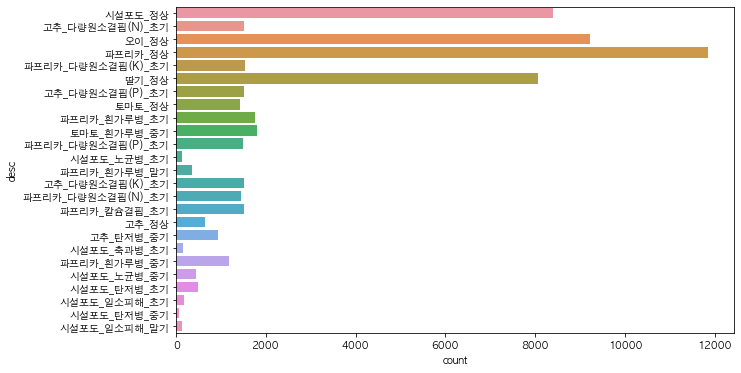

In [6]:
# train 데이터의 label별 개수 
plt.figure(figsize=(10, 6))
sns.countplot(y='desc', data=df)

100%|████████████████████████████████████| 57673/57673 [05:39<00:00, 169.86it/s]


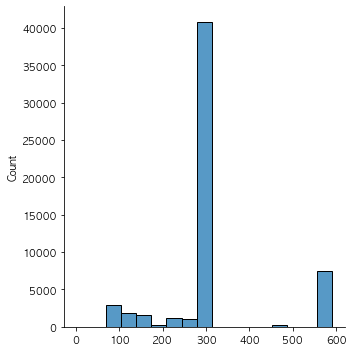

In [7]:
env_paths = sorted(glob(os.path.join(args.train_data_path, '*/*.csv')))

env_features = ['내부 온도 1 평균', '내부 온도 1 최고', '내부 온도 1 최저', 
                '내부 이슬점 평균', '내부 이슬점 최고', '내부 이슬점 최저']
             
env_len = []

for path in tqdm(env_paths):
    env_df = pd.read_csv(path)[env_features]
    env_len.append(len(env_df))

sns.displot(env_len) 


In [8]:
print(f'전체 train 데이터의 환경변수 sequence length max값 : {np.max(env_len)}')
print(f'전체 train 데이터의 환경변수 sequence length min값 : {np.min(env_len)}')
print(f'전체 train 데이터의 환경변수 sequence length mean값 : {np.mean(env_len)}')
print(f'전체 train 데이터의 환경변수 sequence length median값 : {np.median(env_len)}')

전체 train 데이터의 환경변수 sequence length max값 : 590
전체 train 데이터의 환경변수 sequence length min값 : 1
전체 train 데이터의 환경변수 sequence length mean값 : 308.93286286477206
전체 train 데이터의 환경변수 sequence length median값 : 294.0


In [9]:
len_df = pd.DataFrame({'image' : df['image'].values,
                       'label' : df['label'].values,
                       'desc' : df['desc'].values,
                       'env_len' : env_len})

len_df.groupby(['label', 'desc'])['env_len'].agg(['min', 'max', 'mean', 'median']).reset_index()

,label,desc,min,max,mean,median
0,1_00_0,딸기_정상,1,590,307.048711,294.0
1,2_00_0,토마토_정상,1,588,305.690526,294.0
2,2_a5_2,토마토_흰가루병_중기,43,588,311.452368,294.0
3,3_00_0,파프리카_정상,1,590,308.485097,294.0
4,3_a9_1,파프리카_흰가루병_초기,43,588,310.644774,294.0
5,3_a9_2,파프리카_흰가루병_중기,74,588,313.292662,294.0
6,3_a9_3,파프리카_흰가루병_말기,74,588,305.178674,294.0
7,3_b3_1,파프리카_칼슘결핍_초기,1,590,311.281560,294.0
8,3_b6_1,파프리카_다량원소결핍(N)_초기,1,588,305.775482,294.0
9,3_b7_1,파프리카_다량원소결핍(P)_초기,1,588,311.131773,294.0


In [18]:
# 이미지 시각화 함수 
def visualize_image(disease_code:str, num:int=8):
    img_list = list(df.loc[df['label'].str.contains(disease_code)].sample(num)['image'])

    fig, axs = plt.subplots(2, 4, figsize=(12, 7))
    fig.suptitle(label_description[disease_code+"_0"] + f'({disease_code})', fontsize=15)

    axs = axs.flatten()
    for img_code, ax in zip(img_list, axs):
        image = img.imread(os.path.join(args.train_data_path, str(img_code), str(img_code)+'.jpg'))
        ax.imshow(image)
        ax.set_title(str(img_code))
    
    plt.show()


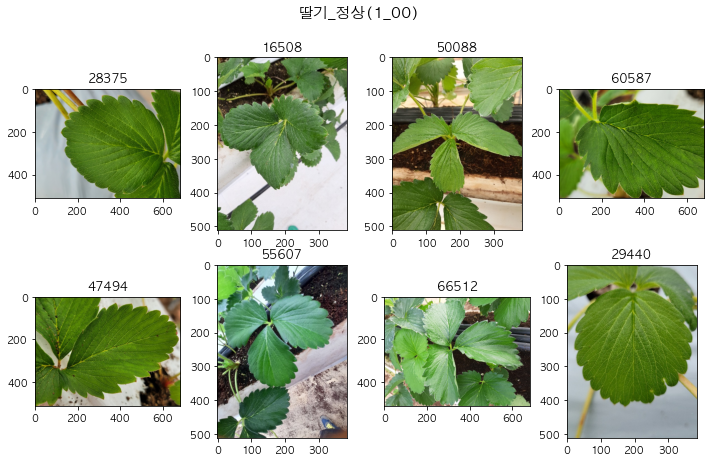

In [19]:
# 딸기 정상 
visualize_image('1_00')

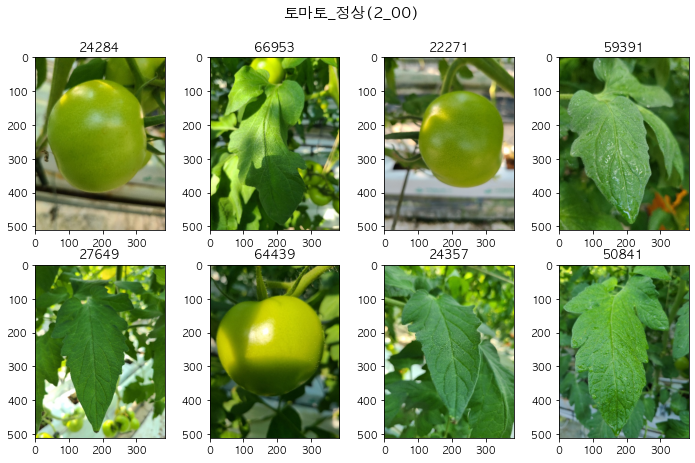

In [20]:
# 토마토 정상 
visualize_image('2_00')

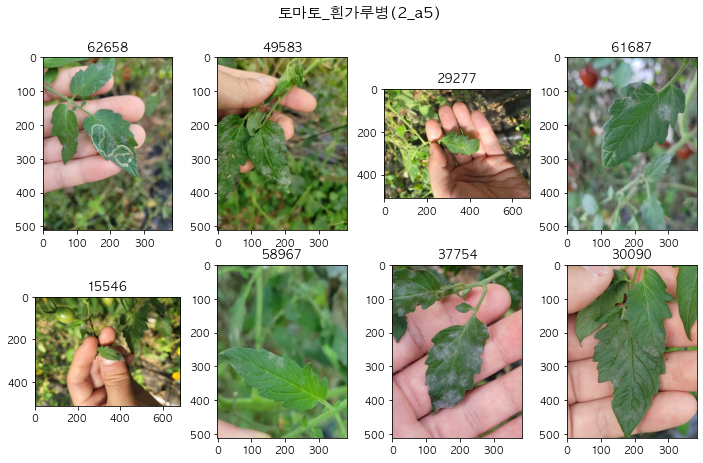

In [23]:
def visualize_image(disease_code:str, num:int=8):
    img_list = list(df.loc[df['label'].str.contains(disease_code)].sample(num)['image'])

    fig, axs = plt.subplots(2, 4, figsize=(12, 7))
    fig.suptitle("토마토_흰가루병" + f'({disease_code})', fontsize=15)

    axs = axs.flatten()
    for img_code, ax in zip(img_list, axs):
        image = img.imread(os.path.join(args.train_data_path, str(img_code), str(img_code)+'.jpg'))
        ax.imshow(image)
        ax.set_title(str(img_code))
    
    plt.show()
    
visualize_image('2_a5')

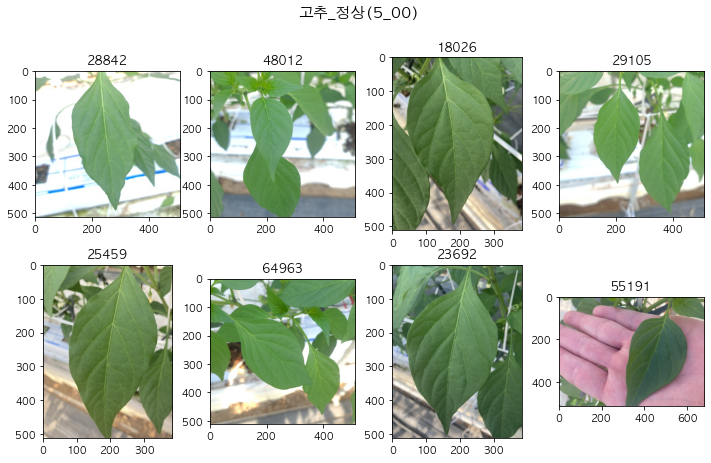

In [21]:
# 고추 정상 
visualize_image('5_00')

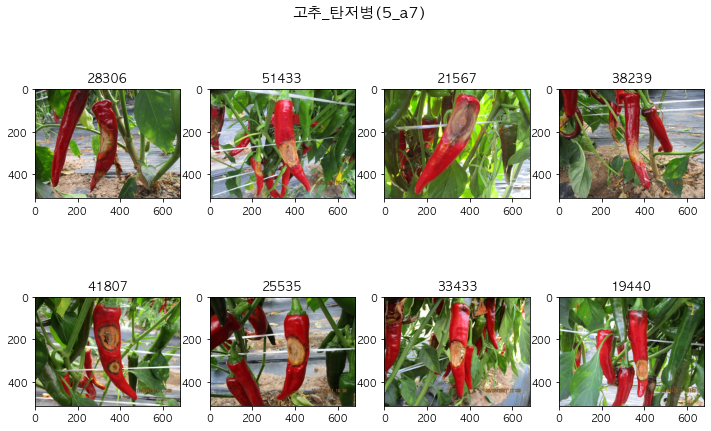

In [22]:
def visualize_image(disease_code:str, num:int=8):
    img_list = list(df.loc[df['label'].str.contains(disease_code)].sample(num)['image'])

    fig, axs = plt.subplots(2, 4, figsize=(12, 7))
    fig.suptitle("고추_탄저병" + f'({disease_code})', fontsize=15)

    axs = axs.flatten()
    for img_code, ax in zip(img_list, axs):
        image = img.imread(os.path.join(args.train_data_path, str(img_code), str(img_code)+'.jpg'))
        ax.imshow(image)
        ax.set_title(str(img_code))
    
    plt.show()
    
visualize_image('5_a7')

In [24]:
def plot_env_features(disease_code:str, num:int=12):
    img_list = list(df.loc[df['label'] == disease_code]['image'].sample(num))
    env_features = ['내부 온도 1 평균', '내부 온도 1 최고', '내부 온도 1 최저', '내부 이슬점 평균', '내부 이슬점 최고', '내부 이슬점 최저']

    fig, axs = plt.subplots(2, 3, figsize=(16, 7))
    fig.suptitle(label_description[disease_code][:-3], fontsize=14)

    for img_code in img_list:
        _meta = pd.read_csv(os.path.join(args.train_data_path, str(img_code), str(img_code)+'.csv'))[env_features]
        _meta = _meta.reindex(index=_meta.index[::-1]) 
        axs[0, 0].plot(_meta['내부 온도 1 평균'])
        axs[0, 0].set_title('내부 온도 1 평균')
        axs[0, 1].plot(_meta['내부 온도 1 최고'])
        axs[0, 1].set_title('내부 온도 1 최고')
        axs[0, 2].plot(_meta['내부 온도 1 최저'])
        axs[0, 2].set_title('내부 온도 1 최저')
        axs[1, 0].plot(_meta['내부 이슬점 평균'])
        axs[1, 0].set_title('내부 이슬점 평균')
        axs[1, 1].plot(_meta['내부 이슬점 최고'])
        axs[1, 1].set_title('내부 이슬점 최고')
        axs[1, 2].plot(_meta['내부 이슬점 최저'])
        axs[1, 2].set_title('내부 이슬점 최저')

    plt.show()

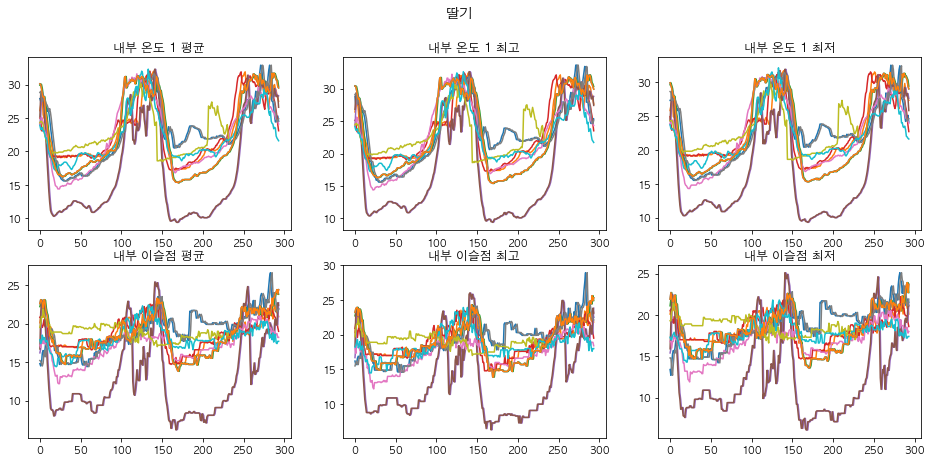

In [25]:
# 딸기 정상 
plot_env_features('1_00_0')

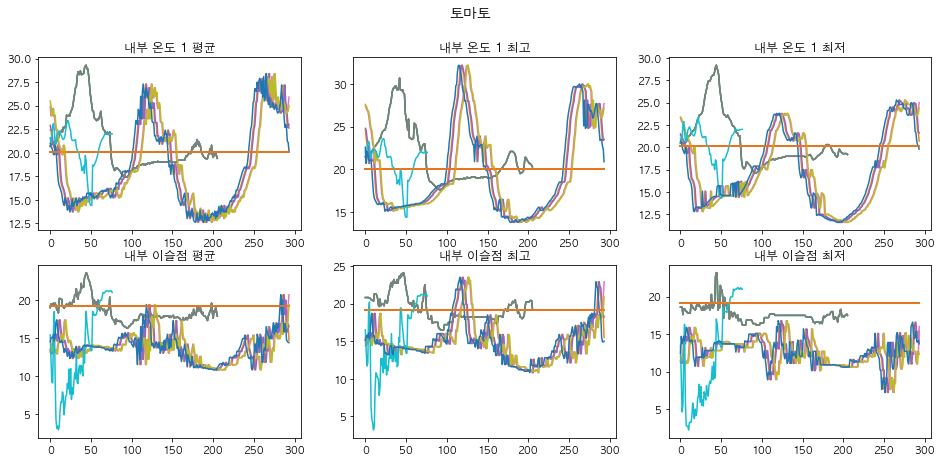

In [26]:
# 토마토 정상 
plot_env_features('2_00_0')

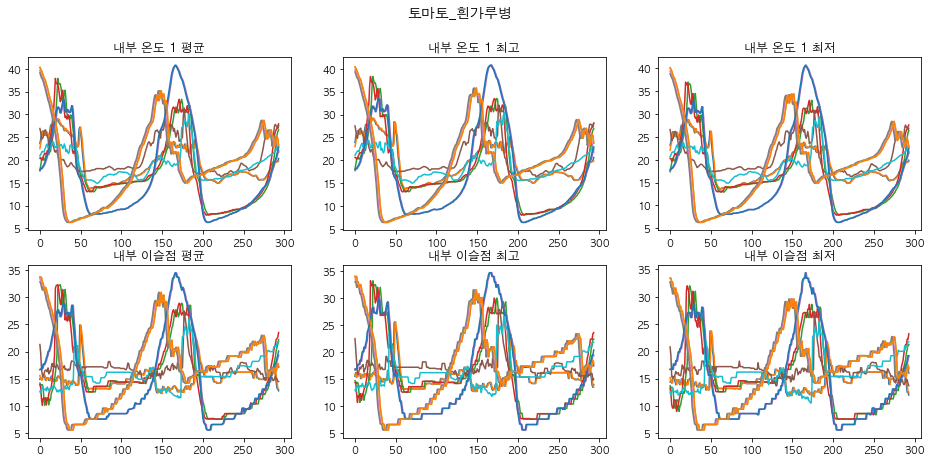

In [27]:
# 토마토 흰가루병 중기 
plot_env_features('2_a5_2')

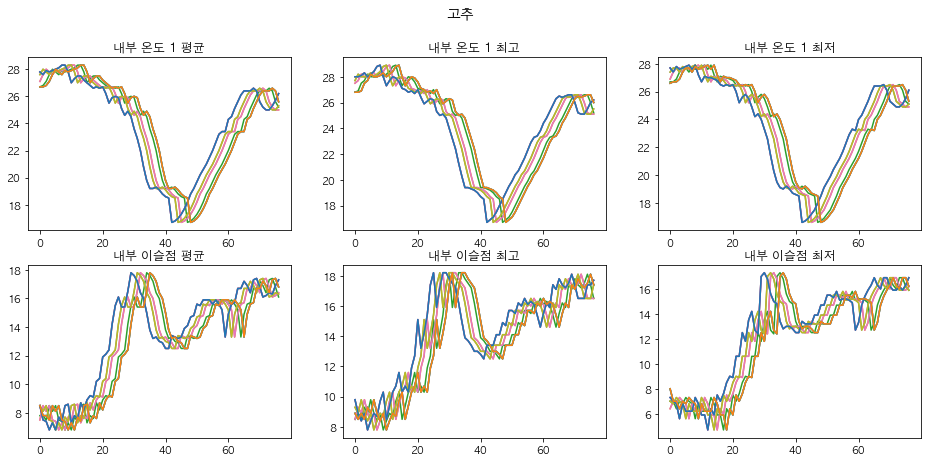

In [28]:
# 고추 정상   
plot_env_features('5_00_0')

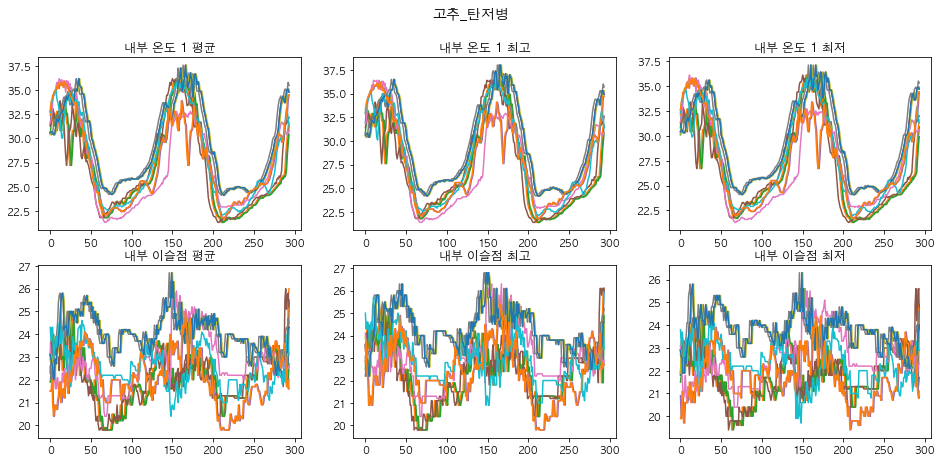

In [29]:
# 고추 탄저병 중기 
plot_env_features('5_a7_2')